# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [213]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [214]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean()

Categoria
belleza-y-cuidado-personal    1783.556485
comidas-preparadas            3095.043478
congelados                    2108.042553
frutas                        1724.473684
instantaneos-y-sopas           765.491228
lacteos                       2385.219239
verduras                      1343.296875
Name: Preco_Normal, dtype: float64

In [215]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median()

Categoria
belleza-y-cuidado-personal    1569.0
comidas-preparadas            3290.0
congelados                    1519.0
frutas                        1195.0
instantaneos-y-sopas           439.0
lacteos                        989.0
verduras                      1180.0
Name: Preco_Normal, dtype: float64

As categorias: belleza-y-cuidado-personal, congelados, frutas, instantaneos-y-sopas, lacteos e verduras estão com a média acima da mediana.                                                                                                    
Enquanto isso, a categoria: comidas-preparadas é a unica cujo a média está abaixo da mediana.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [216]:
#Seu código aqui

df.groupby('Categoria')['Preco_Normal'].agg( media='mean', mediana= 'median', desvio_padrao='std').reset_index()


,Categoria,media,mediana,desvio_padrao
0,belleza-y-cuidado-personal,1783.556485,1569.0,2210.041719
1,comidas-preparadas,3095.043478,3290.0,2019.911428
2,congelados,2108.042553,1519.0,2111.539896
3,frutas,1724.473684,1195.0,1639.151114
4,instantaneos-y-sopas,765.491228,439.0,1170.232869
5,lacteos,2385.219239,989.0,3925.816164
6,verduras,1343.296875,1180.0,1012.699625


na categoria de produtos lácteos, que é a de maior desvio padrão, pode-se ver que a média é bem maior que a mediana, o que indica que há outliers nos preços dessa categoria, de forma que afetam a média dos preços para acima do que seria esperado sem esses outliers.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

In [217]:
#Seu código aqui
lacteos = df.loc[df['Categoria'] == 'lacteos']
fig=px.box(df, y='Preco_Normal',title='Boxplot da distribuição do Preço de laticinios')
#exibindo o gráfico
fig.show()

Pelo que se pode ver na distribuição do grafico boxplot, existe muitos outliers entre os preços desta categoria de produtos, visto que a mediana é 1269, mas alguns preços chegam até acima de 19 mil.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

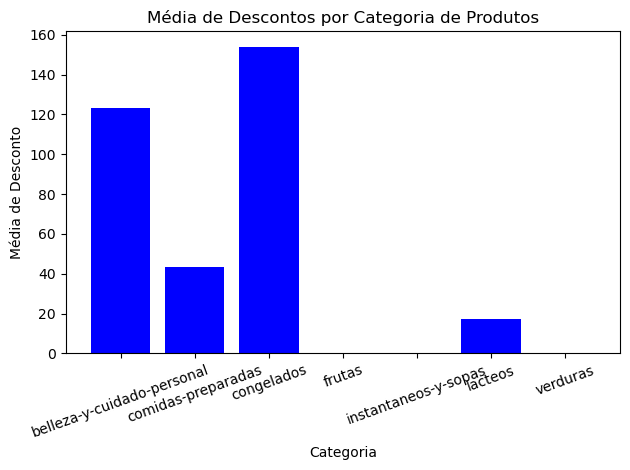

In [218]:
# Seu código aqui
media_descontos = df.groupby('Categoria')['Desconto'].mean().reset_index()

plt.bar(media_descontos['Categoria'], media_descontos['Desconto'], color='blue')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto')
plt.title('Média de Descontos por Categoria de Produtos')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [219]:
# Ordenar marcas pela média de preço ascendente
marca_ordem = grouped.groupby('Marca')['Media_de_preco'].mean().sort_values().index
categoria_ordem = grouped.groupby('Categoria')['Media_de_preco'].mean().sort_values().index

grouped['Marca'] = pd.Categorical(grouped['Marca'], categories=marca_ordem, ordered=True)
grouped['Categoria'] = pd.Categorical(grouped['Categoria'], categories=categoria_ordem, ordered=True)

# Ordena o DataFrame de acordo com as novas ordens
grouped.sort_values(['Marca', 'Categoria'], inplace=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_2372\4151687317.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\arthu\AppData\Local\Temp\ipykernel_2372\4151687317.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



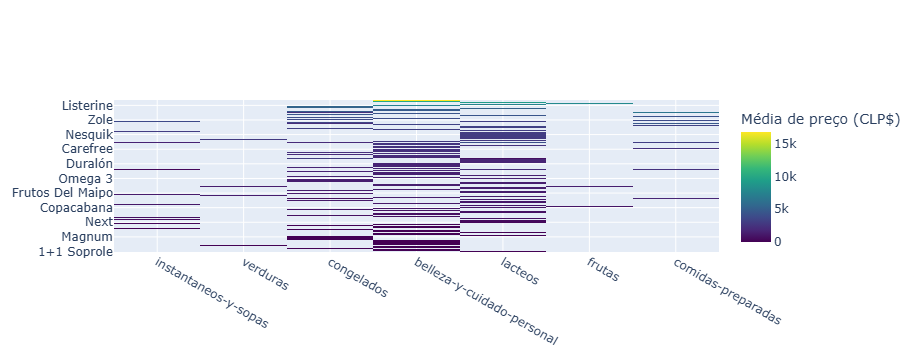

In [220]:
import plotly.graph_objects as go

heatmap_price = go.Heatmap(
    x=grouped['Categoria'],
    y=grouped['Marca'],
    z=grouped['Media_de_preco'],
    text=grouped.apply(lambda row: f"Preço: CLP${row['Media_de_preco']:.2f}", axis=1),
    hoverinfo="text",
    colorscale='Viridis',
    colorbar=dict(title="Média de preço (CLP$)")
)

import plotly.io as pio
fig = go.Figure(data=[heatmap_price])
fig.update_layout(
    xaxis={'categoryorder': 'array', 'categoryarray': list(categoria_ordem)},
    yaxis={'categoryorder': 'array', 'categoryarray': list(marca_ordem)}
)
fig.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_2372\2195954312.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\arthu\AppData\Local\Temp\ipykernel_2372\2195954312.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



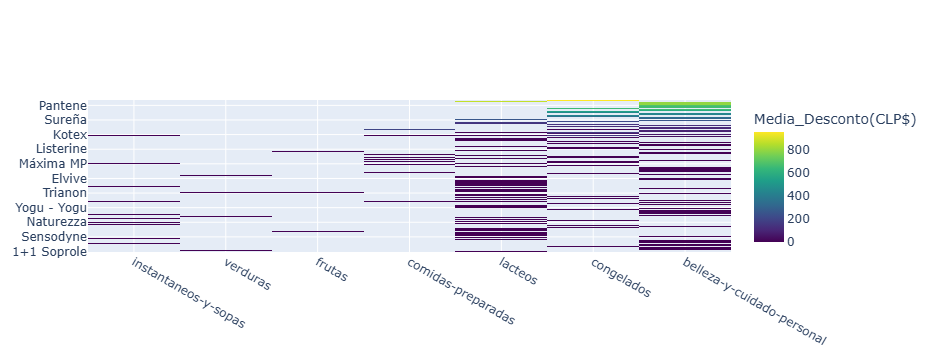

In [221]:
# Ordenar marcas pela média de desconto ascendente
marca_ordem = grouped.groupby('Marca')['Media_Desconto'].mean().sort_values().index
categoria_ordem = grouped.groupby('Categoria')['Media_Desconto'].mean().sort_values().index


grouped['Marca'] = pd.Categorical(grouped['Marca'], categories=marca_ordem, ordered=True)
grouped['Categoria'] = pd.Categorical(grouped['Categoria'], categories=categoria_ordem, ordered=True)

# Ordena o DataFrame de acordo com as novas ordens
grouped.sort_values(['Marca', 'Categoria'], inplace=True)

heatmap_price = go.Heatmap(
    x=grouped['Categoria'],
    y=grouped['Marca'],
    z=grouped['Media_Desconto'],
    text=grouped.apply(lambda row: f"Preço: CLP${row['Media_Desconto']:.2f}", axis=1),
    hoverinfo="text",
    colorscale='Viridis',
    colorbar=dict(title="Media_Desconto(CLP$)")
)

fig = go.Figure(data=[heatmap_price])
fig.update_layout(
    xaxis={'categoryorder': 'array', 'categoryarray': list(categoria_ordem)},
    yaxis={'categoryorder': 'array', 'categoryarray': list(marca_ordem)}
)
fig.show()

Ao analisar e passar a seta do mouse em ambos os gráficos, é possivel perceber que as categorias com a maior média de preços, tambem possuem a maior média de descontos.

OBS: Este exercício foi feito baseado em uma lista de produtos de um mercado no chile, por isso o simbolo da moeda está como "CLP$" pois é o simbolo do peso chilelo.